In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

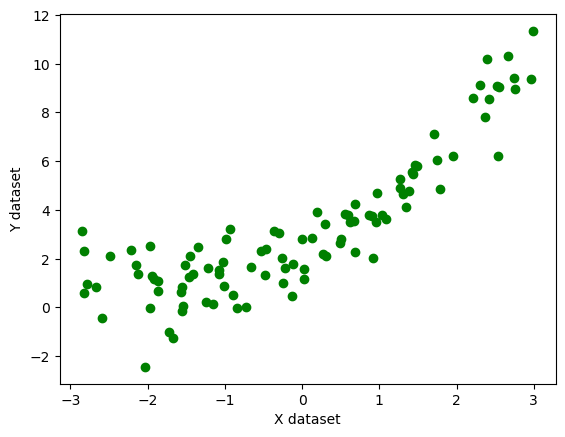

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
plt.scatter(X, y, color= 'g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regressor.predict(X_test))
score

0.33929746073999867

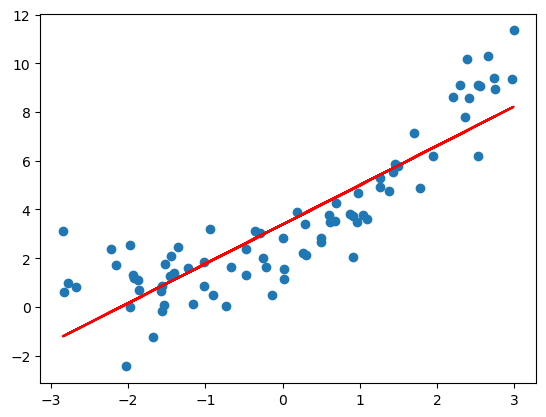

In [6]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regressor.predict(X_train), color='r')


In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [8]:
regressor_poly = LinearRegression()
regressor_poly.fit(X_train_poly, y_train)
y_pred = regressor_poly.predict(X_test_poly)
score2 = r2_score(y_test,y_pred)
score2

0.7389552656173777

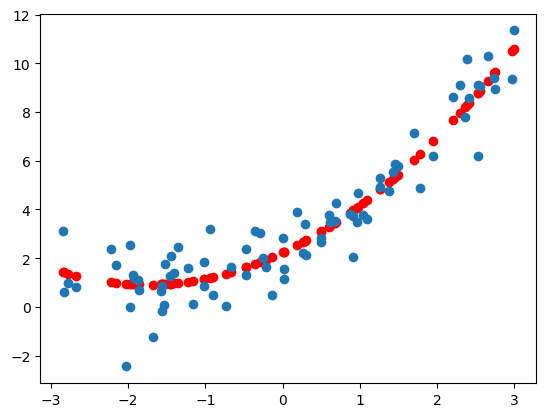

In [27]:
plt.scatter(X_train, regressor_poly.predict(X_train_poly), color='r', )
plt.scatter(X_train,y_train)


In [34]:
from sklearn.pipeline import Pipeline
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    poly_features = PolynomialFeatures(degree= degree, include_bias= True)
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])

    poly_regression.fit(X_train, y_train)
    y_pred_new  = poly_regression.predict(X_new)

    plt.plot(X_new, y_pred_new, 'r', label = 'Degree' + str(degree), linewidth=2)
    plt.plot(X_train, y_train, 'b.', linewidth=3)
    plt.plot(X_test, y_test,'g.', linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4, 4, 0, 10])
    plt.show()


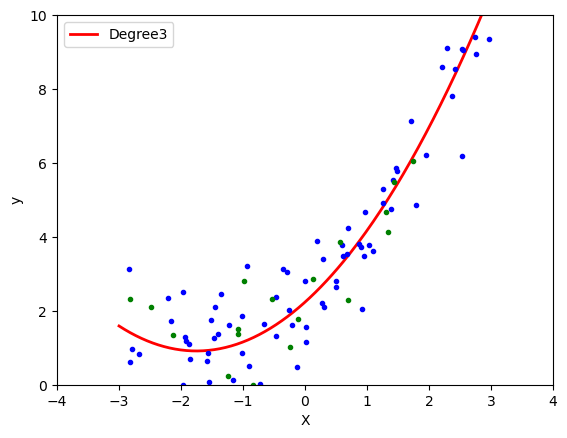

In [40]:
poly_regression(3)